In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.size"] = 18
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [79]:
def draw_graph(adj_list, positions, axis=False, edges=True, node_size=3, save=False, file_name=""):
    edge_coordinates = np.array([[positions[edge[0]], positions[edge[1]]] for edge in adj_list])
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot()
    ax.scatter(*positions.T, s=node_size) #.T-> shape=(2, num_nodes), *-> 2 seperate lists with num_nodes elements each
    if edges:
        for edge in edge_coordinates: #edge shape = (2, 2)
            ax.plot(*edge.T, c="dimgrey", alpha=0.5)
    #ax.set_xlim(-10, 10)
    #ax.set_ylim(-10, 10)
    if not axis:
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        plt.axis('off')
    if save:
        fig.savefig(file_name, dpi=300, bbox_inches="tight")

In [82]:
dir = "Data/DataSet2/yes/"
file_id = "700"

locs = np.loadtxt(f"{dir}{file_id}.locs")[:,:2] #0<=locs.x,locs.y<=1 shape=[100, 3]
adj = list()

with open(f"{dir}{file_id}.adj", "r") as file:
    # Read each line in the file
    n_line = 0
    for line in file:
        line = line.strip()
        neighbors = []
        if line != "None":
            neighbors = [int(id) for id in line.split()]        
        for neighbor in neighbors:
            adj.append([n_line, neighbor])
        n_line += 1

adj_list = np.array(adj, dtype=int)

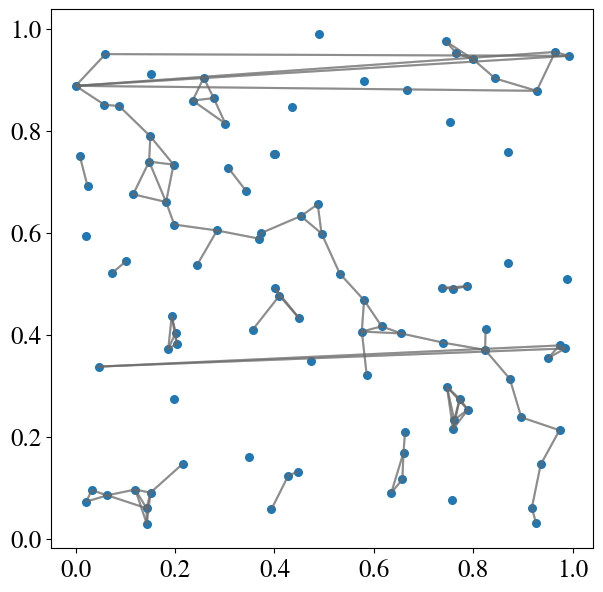

In [83]:
draw_graph(adj_list, locs[:, :2], node_size=30, axis=True)